Importa todas bibliotecas utilizadas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn import linear_model
import seaborn as sns
import operator
import sys
import zipfile

Abre csv com o dataset

In [7]:
with zipfile.ZipFile('Train_rev1.zip') as myzip:
    with myzip.open('Train_rev1.csv') as myfile:
        df = pd.read_csv(myfile)

Verifica todas colunas do dataset

In [12]:
for column in df:
    print(column)

Id
Title
FullDescription
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SalaryRaw
SalaryNormalized
SourceName


Transforma todas as colunas em inteiro

In [15]:
number = LabelEncoder()
for column in df:
    if not df[column].dtype == np.int64:
        df[column] = number.fit_transform(df[column].astype(str))


Verificação das variáveis de maior importância, por meio de sua dependência com o target (no caso, a variável SalaryNormalized).
Após a análise da matriz, verificou-se que as colunas título, localização e descrição são umas das mais improtantes do dataset

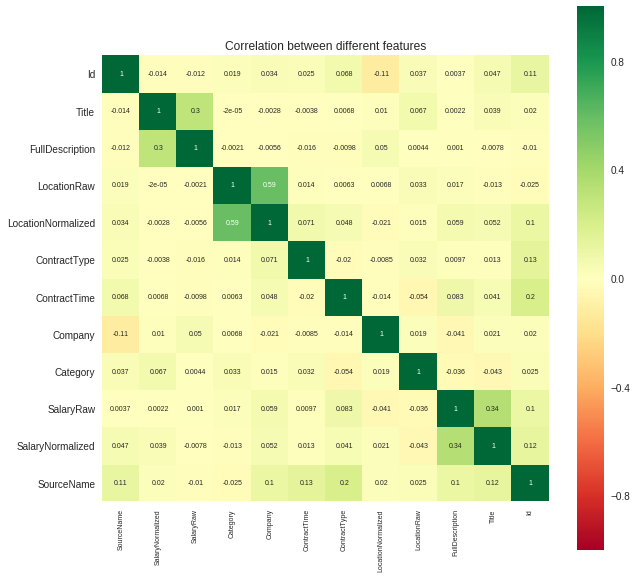

In [19]:
correlation = df.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='RdYlGn',xticklabels=True,yticklabels=True, annot_kws={"size":7})
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), size=7, rotation =90)
plt.title('Correlation between different features')
sns.plt.show()

Histograma de frequência de salários

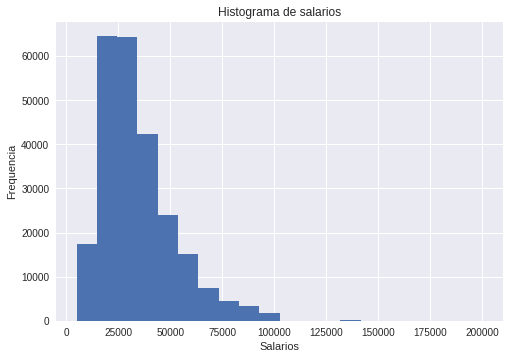

In [25]:
plt.hist(df['SalaryNormalized'], bins=20)
plt.ylabel('Frequencia')
plt.xlabel('Salarios')
plt.title('Histograma de salarios')
plt.show()

Histograma de salários com a escala log. Como pode se notar, com a utilização da escala logarítmica o dado se torna menos enviesado

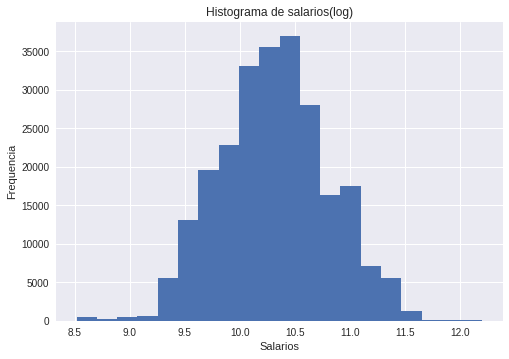

In [30]:
df['SalaryNormalized_log'] = np.log(df['SalaryNormalized'])
plt.hist(df['SalaryNormalized_log'], bins=20)
plt.ylabel('Frequencia')
plt.xlabel('Salarios')
plt.title('Histograma de salarios(log)')
plt.show()

Realização do primeiro modelo

In [32]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()

reg_all.fit(X_treino, y_treino)
y_pred = reg_all.predict(X_teste)
print('score: %.2f' % reg_all.score(X_teste, y_teste))
print('explained_variance_score: %.2f' % explained_variance_score(y_teste, y_pred))
print('mean_absolute_error: %.2f:' % mean_absolute_error(y_teste, y_pred))
print('mean_absolute_error: %.2f' % mean_squared_error(y_teste, y_pred))
print('r^2 score: %.2f' % r2_score(y_teste, y_pred))

score: 0.12
explained_variance_score: 0.12
mean_absolute_error: 11842.28:
mean_absolute_error: 270943649.67
r^2 score: 0.12
